<a href="https://colab.research.google.com/github/Mandar-Desurkar/Machine_Learning_Lab/blob/main/Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TP:70 FP:4 TN:39 FN:1
[[39  4]
 [ 1 70]]
Acc: 0.956140350877193
Prec: 0.9459459459459459
Rec: 0.9859154929577465
F1_score: 0.9655172413793103
MCC: 0.9068106119605033
Spec: 0.9069767441860465
NPV: 0.975


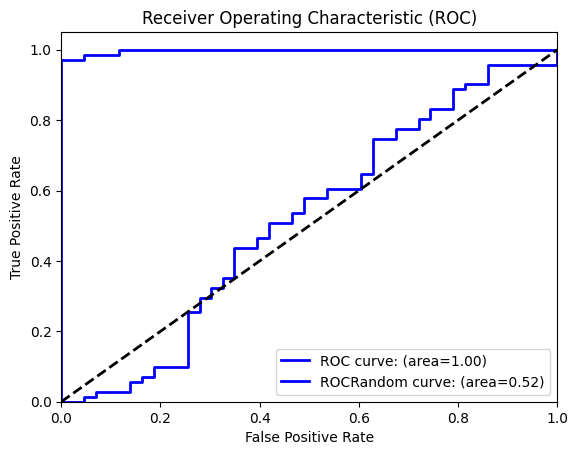

AUC (test data): 0.9977071732721913
AUC (Random data): 0.5162135604323617


In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Define confusion function
def conf(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    tn = np.sum((y_true == 0) & (y_pred == 0))
    fn = np.sum((y_true == 1) & (y_pred == 0))
    return tp, fp, tn, fn

# Calculate confusion matrix values
tp, fp, tn, fn = conf(y_test, y_pred)
print(f'TP:{tp} FP:{fp} TN:{tn} FN:{fn}')

# Print sklearn confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Define evaluation metrics
def accuracy(tp, fp, tn, fn):
    return (tp + tn) / (tp + fp + tn + fn) if (tp + fp + tn + fn) != 0 else 0

def precision(tp, fp):
    return tp / (tp + fp) if (tp + fp) != 0 else 0

def recall(tp, fn):
    return tp / (tp + fn) if (tp + fn) != 0 else 0

def f1(precision, recall):
    return 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

def mcc(tp, fp, tn, fn):
    num = (tp * tn) - (fp * fn)
    deno = np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))
    return num / deno if deno != 0 else 0

def spec(tn, fp):
    return tn / (tn + fp) if (tn + fp) != 0 else 0

def npv(tn, fn):
    return tn / (tn + fn) if (tn + fn) != 0 else 0

# Calculate evaluation metrics
acc = accuracy(tp, fp, tn, fn)
pre = precision(tp, fp)
rec = recall(tp, fn)
f1_score = f1(pre, rec)
mcc_value = mcc(tp, fp, tn, fn)
sp = spec(tn, fp)
npv_value = npv(tn, fn)

# Print evaluation metrics
print(f'Acc: {acc}')
print(f'Prec: {pre}')
print(f'Rec: {rec}')
print(f'F1_score: {f1_score}')
print(f'MCC: {mcc_value}')
print(f'Spec: {sp}')
print(f'NPV: {npv_value}')

# ROC curve
y_proba = model.predict_proba(X_test)[:, 1]
random_prob = np.random.rand(len(y_test))

fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

fpr_rand, tpr_rand, _ = roc_curve(y_test, random_prob)
roc_auc_random = auc(fpr_rand, tpr_rand)

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve: (area={roc_auc:.2f})')
plt.plot(fpr_rand, tpr_rand, color='blue', lw=2, label=f'ROCRandom curve: (area={roc_auc_random:.2f})')
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

print(f'AUC (test data): {roc_auc}')
print(f'AUC (Random data): {roc_auc_random}')
